In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Understanding**

### Dataset Description:
- **PatientID**: A unique identifier for each patient. It helps differentiate between individuals in the dataset.
- **Pregnancies**: Number of times the patient has been pregnant. It may influence the risk of diabetes in women.
- **PlasmaGlucose**: Plasma glucose concentration after a glucose tolerance test (mg/dL). Higher levels can indicate diabetes.
- **DiastolicBloodPressure**: Diastolic blood pressure (mm Hg). Measures the pressure in blood vessels between heartbeats.
- **TricepsThickness**: Skinfold thickness of the triceps (mm), often used to estimate body fat.
- **SerumInsulin**: Serum insulin level (μU/mL). High levels may indicate insulin resistance or diabetes.
- **BMI**: Body Mass Index (kg/m²), calculated as weight divided by the square of height. It is a measure of body fat.
- **DiabetesPedigree**: A score indicating the likelihood of diabetes based on family history. Higher values suggest a stronger genetic predisposition.
- **Age**: Age of the patient (years).
- **Diabetic**: Target variable (0 = Non-diabetic, 1 = Diabetic). Indicates whether the patient is diagnosed with diabetes.


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/TAIPEI_diabetes.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [ ]:
# Determine how many instances of each class (0 and 1) are in the 'Diabetic' column
class_counts = data['Diabetic'].value_counts()

# Print the class distribution
print("\nClass distribution in the 'Diabetic' column:")
print(class_counts)


Class distribution in the 'Diabetic' column:
Diabetic
0    10000
1     5000
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np

def find_dynamic_inconsistencies(data):
    inconsistent_conditions = []

    # IQR for outlier detection in each column
    for column in ['Age', 'Pregnancies', 'BMI', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin']:
        if column in data.columns:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            condition = (data[column] < lower_bound) | (data[column] > upper_bound)
            inconsistent_conditions.append(condition)
            print(f"{column}: Outliers identified as below {lower_bound:.2f} or above {upper_bound:.2f}")

    if 'Age' in data.columns and 'Pregnancies' in data.columns:
        condition = (data['Age'] < 15) & (data['Pregnancies'] > data['Pregnancies'].quantile(0.90))
        inconsistent_conditions.append(condition)
        print("Rule 1: Unusually high pregnancies detected for Age < 15.")

    if 'Age' in data.columns and 'Pregnancies' in data.columns:
        condition = (data['Age'] > 20) & (data['Pregnancies'] > 3)
        inconsistent_conditions.append(condition)
        print("Rule 2: Unusually high pregnancies detected for Age under 20.")

    if 'Age' in data.columns and 'BMI' in data.columns:
        condition = (data['Age'] < 10) & (data['BMI'] > 25)
        inconsistent_conditions.append(condition)
        print("Rule 3: Unusually high BMI detected for Age < 10.")

    if 'PlasmaGlucose' in data.columns and 'SerumInsulin' in data.columns:
        condition = (data['PlasmaGlucose'] > 200) & (data['SerumInsulin'] < 10)
        inconsistent_conditions.append(condition)
        print("Rule 4: PlasmaGlucose > 200 with low SerumInsulin detected.")

    if 'DiastolicBloodPressure' in data.columns:
        condition = (data['DiastolicBloodPressure'] < 40) | (data['DiastolicBloodPressure'] > 120)
        inconsistent_conditions.append(condition)
        print("Rule 5: DiastolicBloodPressure detected outside normal range (40-120).")


    if 'SerumInsulin' in data.columns:
        condition = (data['SerumInsulin'] < 1) | (data['SerumInsulin'] > 400)
        inconsistent_conditions.append(condition)
        print("Rule 6: SerumInsulin value detected outside realistic bounds (1-400).")

    # Combine all conditions
    combined_condition = inconsistent_conditions[0]
    for condition in inconsistent_conditions[1:]:
        combined_condition |= condition

    # Identify inconsistent rows
    inconsistent_rows = data[combined_condition]
    return inconsistent_rows

# Apply the dynamic detection
dynamic_inconsistent_rows = find_dynamic_inconsistencies(data)

print("\nDynamic inconsistencies identified:")
print(dynamic_inconsistent_rows)

# Remove inconsistent rows
data = data.drop(dynamic_inconsistent_rows.index)

print(f"\nNumber of inconsistent rows removed: {len(dynamic_inconsistent_rows)}")
print("\nCleaned dataset:")
print(data)


Age: Outliers identified as below 2.50 or above 54.50
Pregnancies: Outliers identified as below -9.00 or above 15.00
BMI: Outliers identified as below -5.74 or above 66.26
PlasmaGlucose: Outliers identified as below 16.50 or above 196.50
DiastolicBloodPressure: Outliers identified as below 17.50 or above 125.50
TricepsThickness: Outliers identified as below -24.00 or above 80.00
SerumInsulin: Outliers identified as below -195.00 or above 429.00
Rule 1: Unusually high pregnancies detected for Age < 15.
Rule 2: Unusually high pregnancies detected for Age under 20.
Rule 3: Unusually high BMI detected for Age < 10.
Rule 4: PlasmaGlucose > 200 with low SerumInsulin detected.
Rule 5: DiastolicBloodPressure detected outside normal range (40-120).
Rule 6: SerumInsulin value detected outside realistic bounds (1-400).

Dynamic inconsistencies identified:
       PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
1        1147438            8             92                      93   

# **Data Cleaning**

1. **Load and Inspect the Data**

In [ ]:
# Check for basic info
data.info()

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Check statistical summary
print("\nStatistical Summary:\n", data.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 8363 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               8363 non-null   int64  
 1   Pregnancies             8363 non-null   int64  
 2   PlasmaGlucose           8363 non-null   int64  
 3   DiastolicBloodPressure  8363 non-null   int64  
 4   TricepsThickness        8363 non-null   int64  
 5   SerumInsulin            8363 non-null   int64  
 6   BMI                     8363 non-null   float64
 7   DiabetesPedigree        8363 non-null   float64
 8   Age                     8363 non-null   int64  
 9   Diabetic                8363 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 718.7 KB

Missing Values:
 PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                    

2. **Handle Missing Values**

In [ ]:
# Fill missing values with mean for numerical columns
data.fillna(data.mean(), inplace=True)

3. **Detect Outliers**

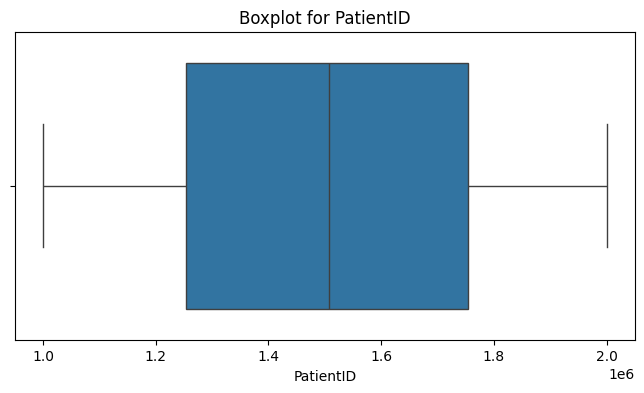

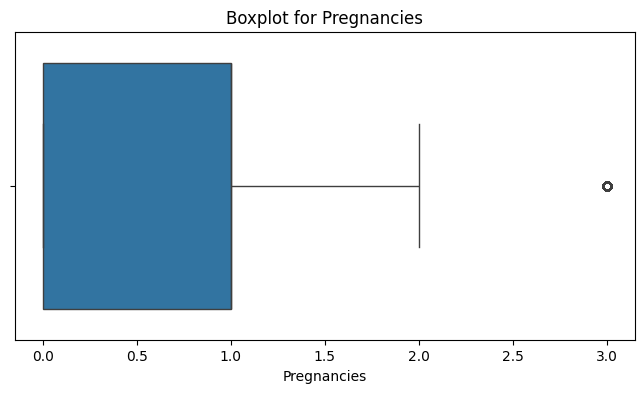

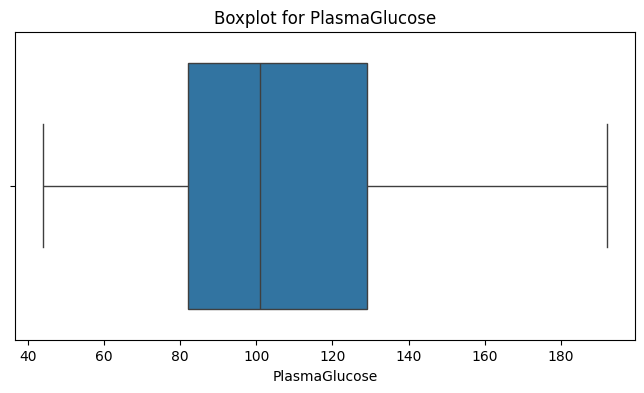

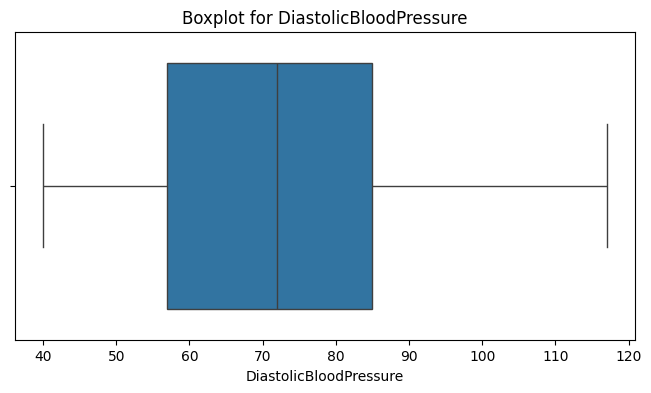

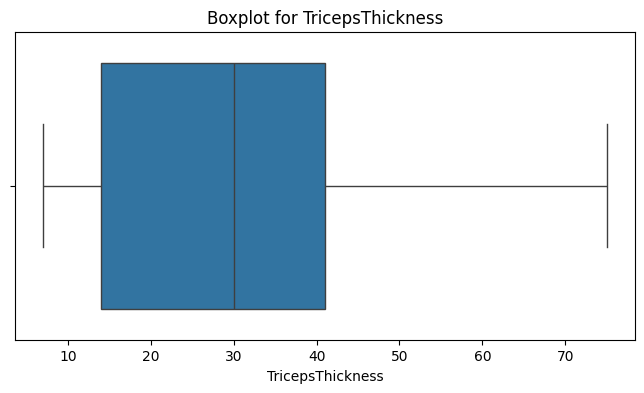

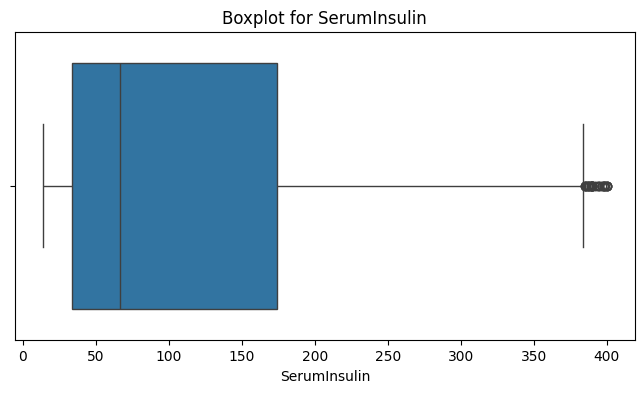

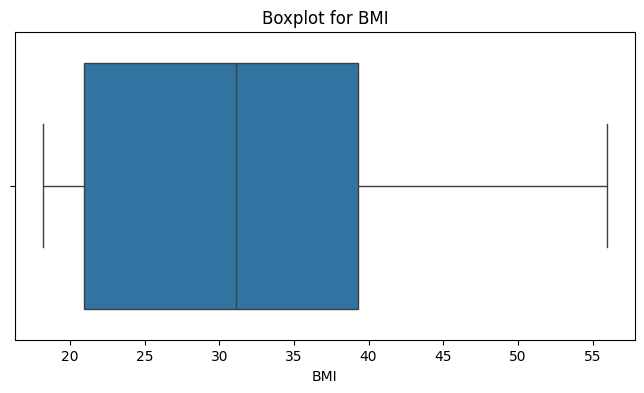

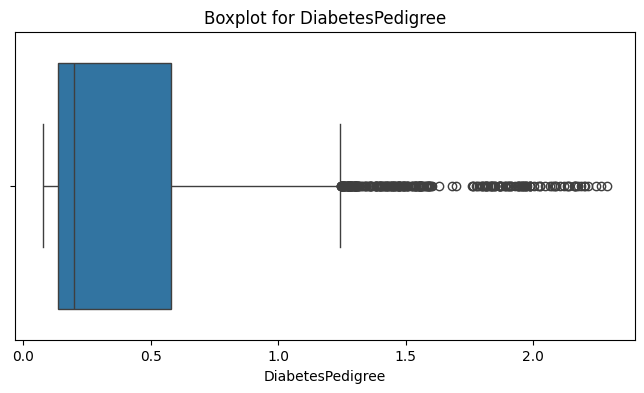

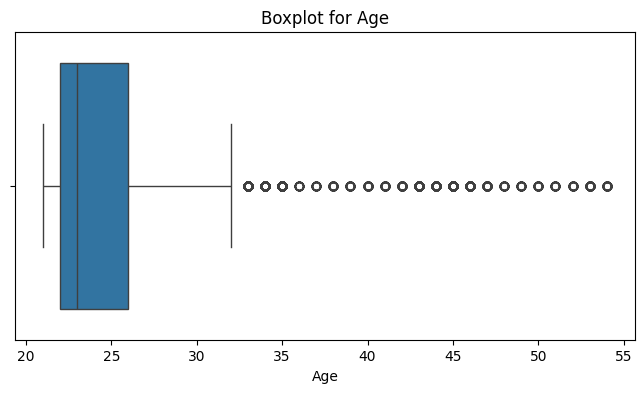

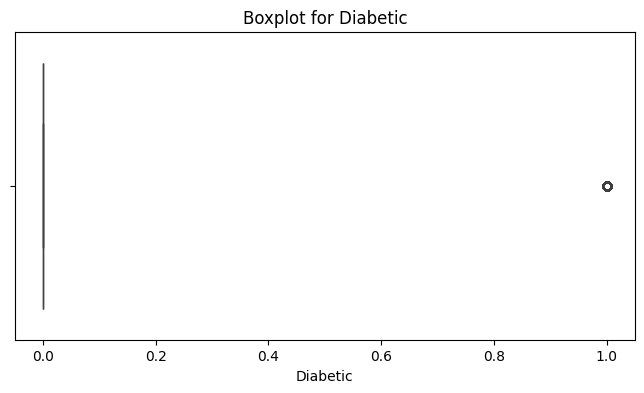

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for numerical columns
numeric_cols = data.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [ ]:
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = data[numeric_cols].apply(zscore)

# Identify rows where z-score > 3 or < -3
outliers = (z_scores.abs() > 3).any(axis=1)

# Show rows with outliers
print("\nOutliers:\n", data[outliers])



Outliers:
        PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
33       1140806            3            123                      61   
53       1300239            3            134                      83   
96       1107050            2            114                      66   
125      1661105            1            119                      60   
158      1379749            0            102                      98   
...          ...          ...            ...                     ...   
14826    1100363            1            138                      79   
14860    1123648            2             91                      97   
14923    1781406            0            169                      49   
14934    1345247            0             92                      44   
14993    1165919            1            128                      59   

       TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
33                   29            46  28.091062

4. **Address Outliers**


**Capping outliers refers to limiting or "clipping" the values of outliers to a certain range, usually defined by the percentile values of the data. here instead of removing outliers completely, we cap them to a threshold value**

In [ ]:
# Option 1: Remove outliers
data_cleaned = data[~outliers]

# Option 2: Cap outliers at 99th percentile
for col in numeric_cols:
    upper_limit = data[col].quantile(0.92)
    lower_limit = data[col].quantile(0.08)
    data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)


5. **Verify Data Cleaning**

In [ ]:
# Check for missing values again
print("\nAfter Cleaning - Missing Values:\n", data.isnull().sum())

# Check for duplicates again
print(f"\nAfter Cleaning - Duplicate rows: {data.duplicated().sum()}")

# Check statistical summary again
print("\nAfter Cleaning - Statistical Summary:\n", data.describe())



After Cleaning - Missing Values:
 PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

After Cleaning - Duplicate rows: 0

After Cleaning - Statistical Summary:
           PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  8.363000e+03  8363.000000    8363.000000             8363.000000   
mean   1.503133e+06     0.850293     106.530312               71.091474   
std    2.782062e+05     1.014636      28.990838               15.413262   
min    1.082179e+06     0.000000      67.000000               48.000000   
25%    1.253724e+06     0.000000      82.000000               57.000000   
50%    1.506977e+06     1.000000     101.000000               72.000000   
75%    1.753922e+06     1.000000     129.000000               85.000000

# **Feature Extraction**

In [ ]:
data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778.0,0,157,80,34,23,43.509726,0.929132,21,0
4,1424119.0,1,85,59,27,35,42.604536,0.549542,22,0
5,1619297.0,0,82,92,9,253,19.724160,0.103424,26,0
6,1660149.0,0,133,48,19,227,21.941357,0.174160,21,0
7,1458769.0,0,67,87,43,36,19.244382,0.236165,26,0


In [ ]:
df = data.copy()

### **Preforming SMOTE to balance both classes for our classying model**

In [ ]:
# Check the class distribution
class_counts = df['Diabetic'].value_counts()
print(f"Original class distribution:\n{class_counts}\n")

Original class distribution:
Diabetic
0    6887
1    1476
Name: count, dtype: int64



In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Diabetic'])
y = df['Diabetic']  # target

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target back into a balanced DataFrame
df = pd.DataFrame(X_resampled, columns=X.columns)
df['Diabetic'] = y_resampled

balanced_class_counts = pd.Series(y_resampled).value_counts()
print(f"Balanced class distribution after SMOTE:\n{balanced_class_counts}")

print("\nFirst few rows of the balanced dataset:")
print(df.head())


Balanced class distribution after SMOTE:
Diabetic
0    6887
1    6887
Name: count, dtype: int64

First few rows of the balanced dataset:
   PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0  1354778.0            0            157                      80   
1  1424119.0            1             85                      59   
2  1619297.0            0             82                      92   
3  1660149.0            0            133                      48   
4  1458769.0            0             67                      87   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          0.929132   21         0  
1                27            35  42.604536          0.549542   22         0  
2                 9           253  19.724160          0.103424   26         0  
3                19           227  21.941357          0.174160   21         0  
4                43            36  19.244382          

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
df

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1.354778e+06,0,157,80,34,23,43.509726,0.929132,21,0
1,1.424119e+06,1,85,59,27,35,42.604536,0.549542,22,0
2,1.619297e+06,0,82,92,9,253,19.724160,0.103424,26,0
3,1.660149e+06,0,133,48,19,227,21.941357,0.174160,21,0
4,1.458769e+06,0,67,87,43,36,19.244382,0.236165,26,0
...,...,...,...,...,...,...,...,...,...,...
13769,1.723805e+06,2,116,88,40,64,39.181969,0.571787,31,1
13770,1.509207e+06,2,114,86,32,116,36.781479,0.167663,21,1
13771,1.478520e+06,2,128,58,40,127,29.720046,0.154415,21,1
13772,1.882482e+06,2,113,75,14,213,37.589681,0.929132,21,1


### **Feature extraction**

In [ ]:
import pandas as pd

# 1. BMI-to-Age Ratio
df['BMI_Age_Ratio'] = df['BMI'] / df['Age']

# 2. Insulin Sensitivity Index (ISI)
df['ISI'] = 10000 / (df['PlasmaGlucose'] * df['SerumInsulin'])

# 3. Blood Pressure Normalized by Age (BP-Age Ratio)
df['BP_Age_Ratio'] = df['DiastolicBloodPressure'] / df['Age']

# 4. High-Risk Pregnancy Index
df['HighRiskPregnancy'] = (df['Pregnancies'] * df['BMI']) / df['Age']

# 5. Glucose-Insulin Product
df['Glucose_Insulin'] = df['PlasmaGlucose'] * df['SerumInsulin']

# 6. Pregnancies-to-Age Ratio
df['Pregnancies_Age_Ratio'] = df['Pregnancies'] / df['Age']

# 7. Metabolic Risk Score
df['Metabolic_Risk'] = (df['BMI'] + df['PlasmaGlucose'] + df['DiastolicBloodPressure']) / 3

# 8. Pedigree-Adjusted Glucose
df['Pedigree_Glucose'] = df['PlasmaGlucose'] * df['DiabetesPedigree']

# 9. Fat Distribution Index
df['Fat_Index'] = (df['BMI'] + df['TricepsThickness']) / 2


In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13774 entries, 0 to 13773
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               13774 non-null  float64
 1   Pregnancies             13774 non-null  int64  
 2   PlasmaGlucose           13774 non-null  int64  
 3   DiastolicBloodPressure  13774 non-null  int64  
 4   TricepsThickness        13774 non-null  int64  
 5   SerumInsulin            13774 non-null  int64  
 6   BMI                     13774 non-null  float64
 7   DiabetesPedigree        13774 non-null  float64
 8   Age                     13774 non-null  int64  
 9   Diabetic                13774 non-null  int64  
 10  BMI_Age_Ratio           13774 non-null  float64
 11  ISI                     13774 non-null  float64
 12  BP_Age_Ratio            13774 non-null  float64
 13  HighRiskPregnancy       13774 non-null  float64
 14  Glucose_Insulin         13774 non-null

In [ ]:
data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778.0,0,157,80,34,23,43.509726,0.929132,21,0
4,1424119.0,1,85,59,27,35,42.604536,0.549542,22,0
5,1619297.0,0,82,92,9,253,19.724160,0.103424,26,0
6,1660149.0,0,133,48,19,227,21.941357,0.174160,21,0
7,1458769.0,0,67,87,43,36,19.244382,0.236165,26,0


In [ ]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,BMI_Age_Ratio,ISI,BP_Age_Ratio,HighRiskPregnancy,Glucose_Insulin,Pregnancies_Age_Ratio,Metabolic_Risk,Pedigree_Glucose,Fat_Index
0,1354778.0,0,157,80,34,23,43.509726,0.929132,21,0,2.071892,2.769316,3.809524,0.00000,3611,0.000000,93.503242,145.873726,38.754863
1,1424119.0,1,85,59,27,35,42.604536,0.549542,22,0,1.936570,3.361345,2.681818,1.93657,2975,0.045455,62.201512,46.711059,34.802268
2,1619297.0,0,82,92,9,253,19.724160,0.103424,26,0,0.758622,0.482021,3.538462,0.00000,20746,0.000000,64.574720,8.480809,14.362080
3,1660149.0,0,133,48,19,227,21.941357,0.174160,21,0,1.044827,0.331225,2.285714,0.00000,30191,0.000000,67.647119,23.163251,20.470678
4,1458769.0,0,67,87,43,36,19.244382,0.236165,26,0,0.740169,4.145937,3.346154,0.00000,2412,0.000000,57.748127,15.823051,31.122191


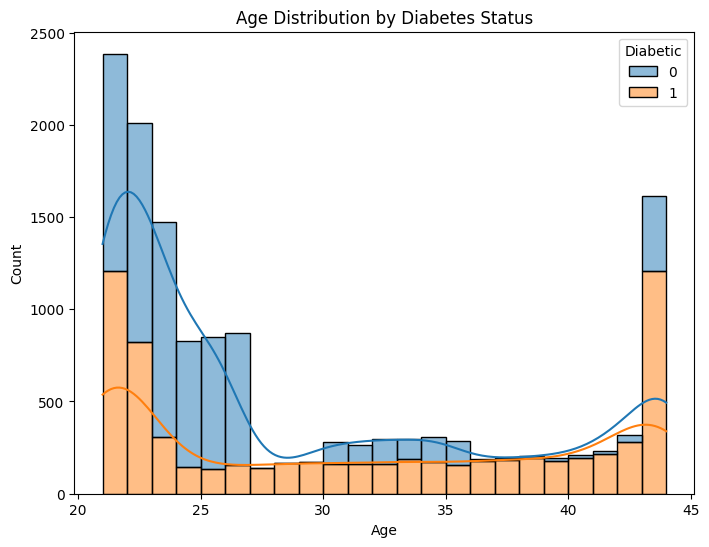

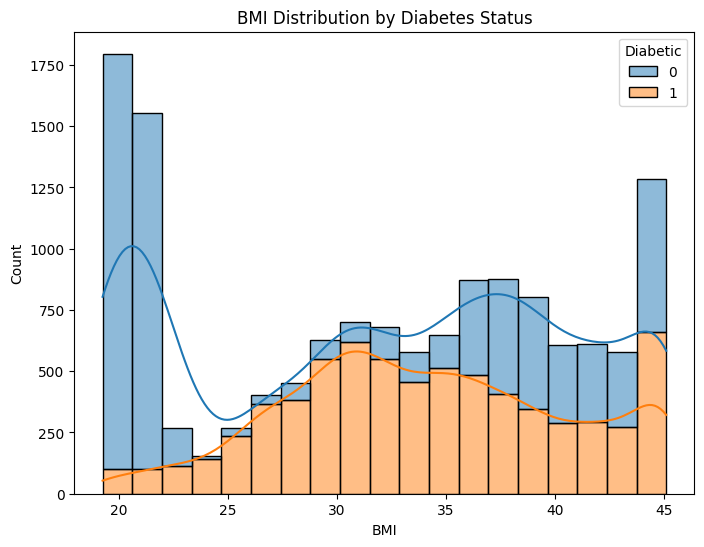

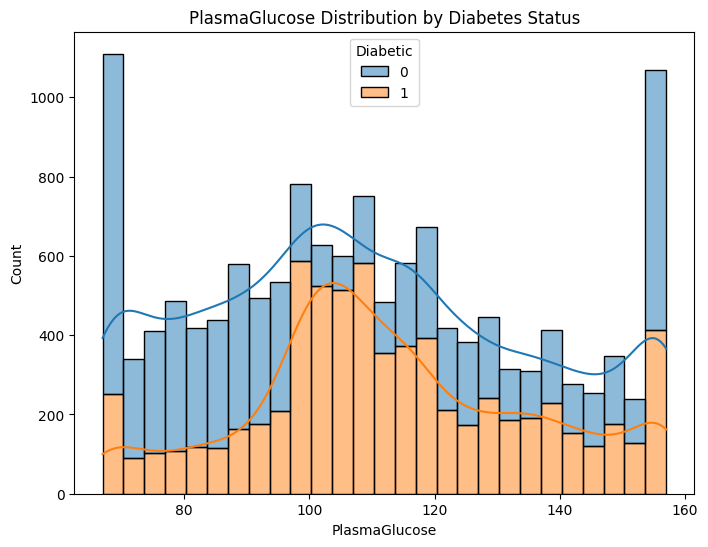

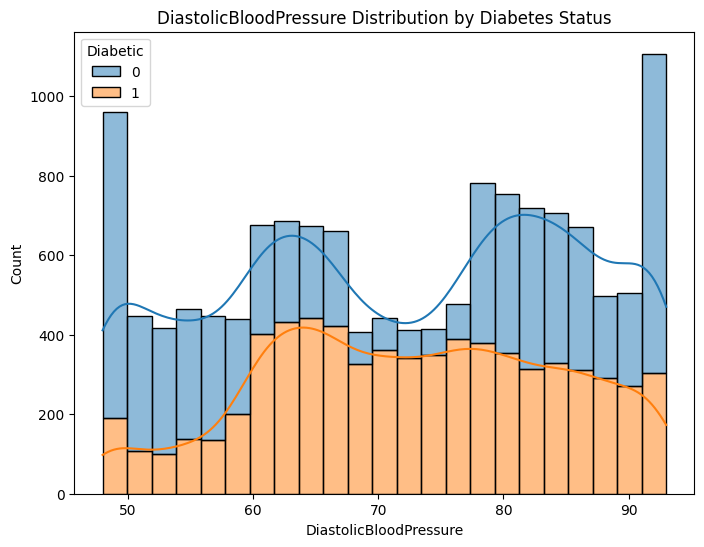

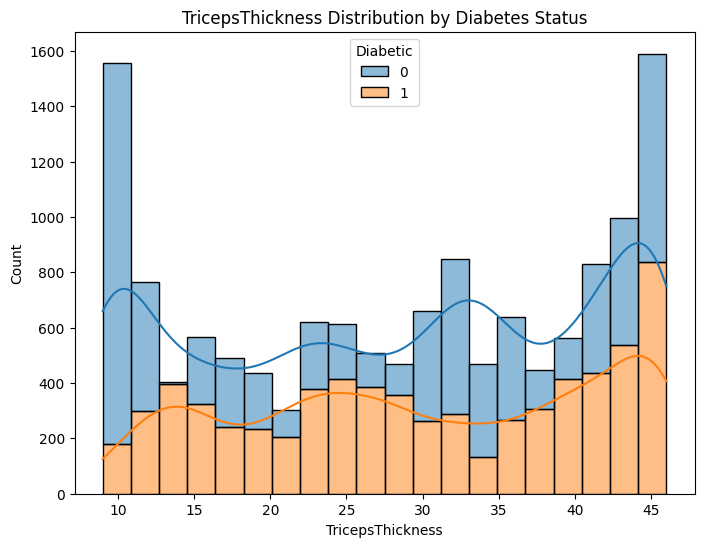

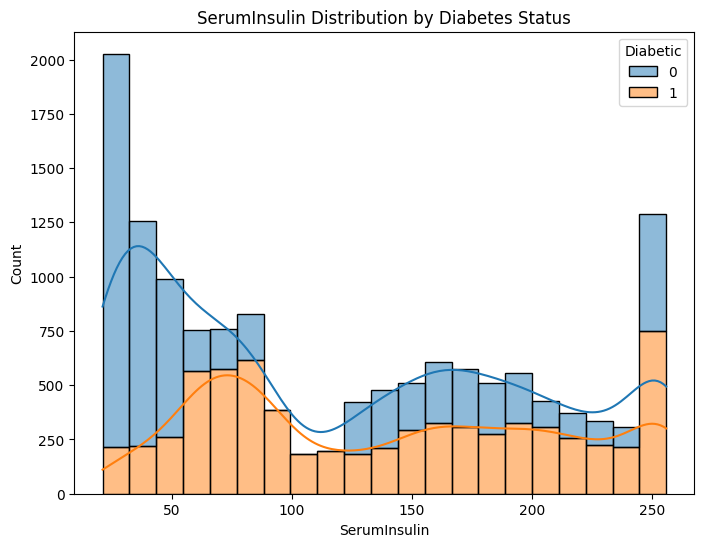

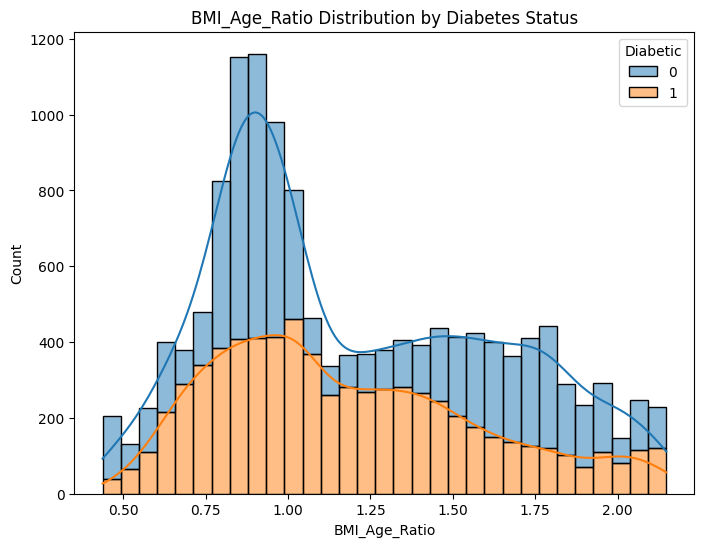

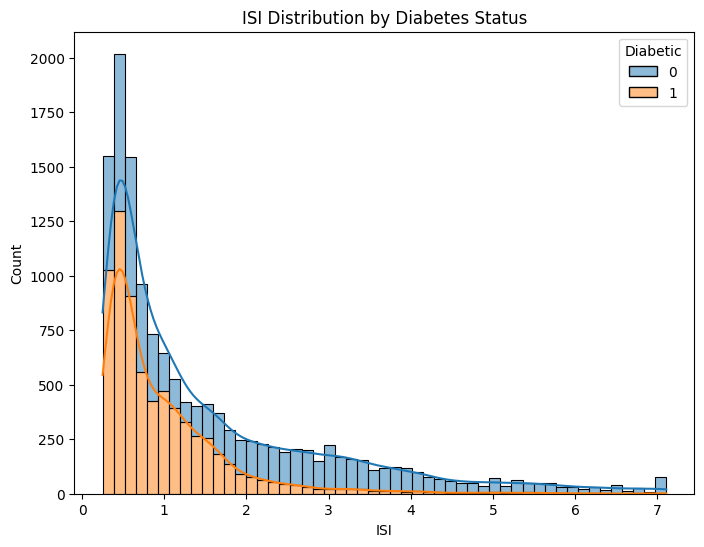

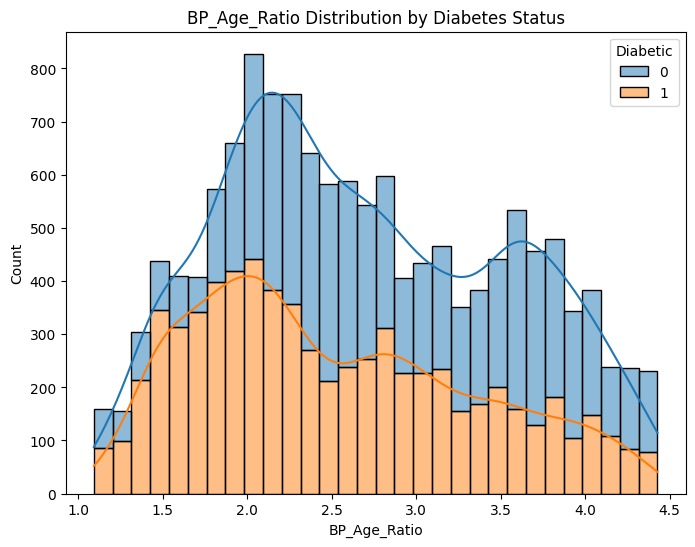

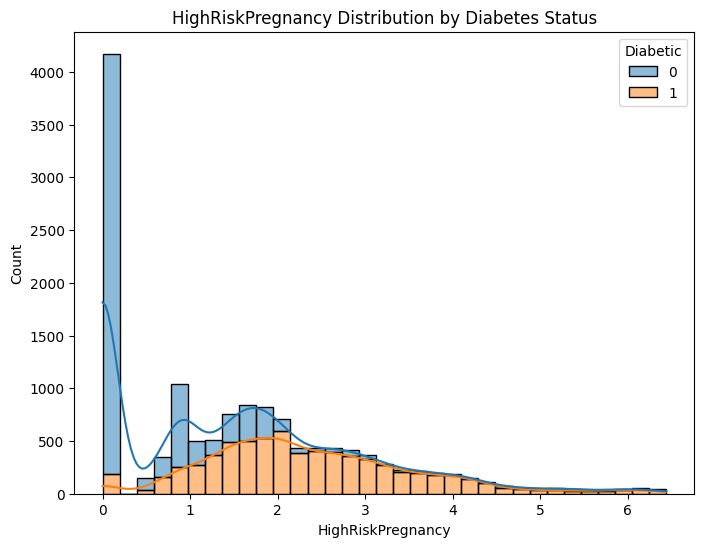

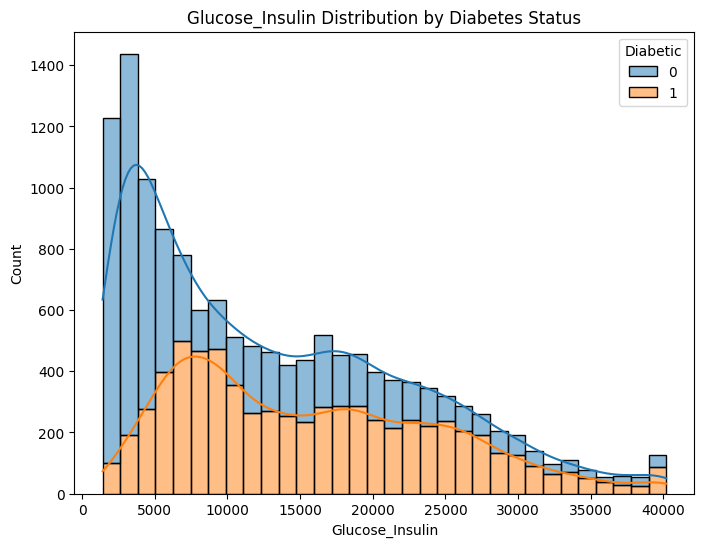

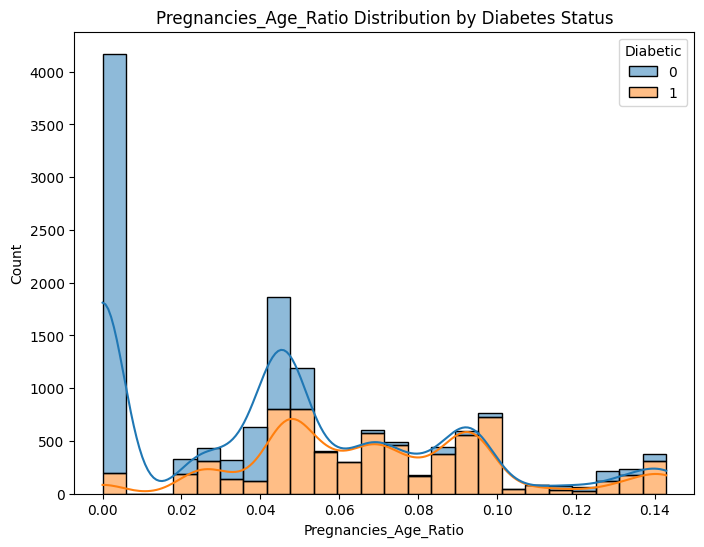

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous features
continuous_features = [
    'Age', 'BMI', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness',
    'SerumInsulin', 'BMI_Age_Ratio', 'ISI', 'BP_Age_Ratio', 'HighRiskPregnancy',
    'Glucose_Insulin', 'Pregnancies_Age_Ratio', 'Metabolic_Risk', 'Pedigree_Glucose', 'Fat_Index'
]

# Plot histograms for continuous features
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='Diabetic', kde=True, multiple='stack')
    plt.title(f'{feature} Distribution by Diabetes Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


## **Correlation Heatmap**


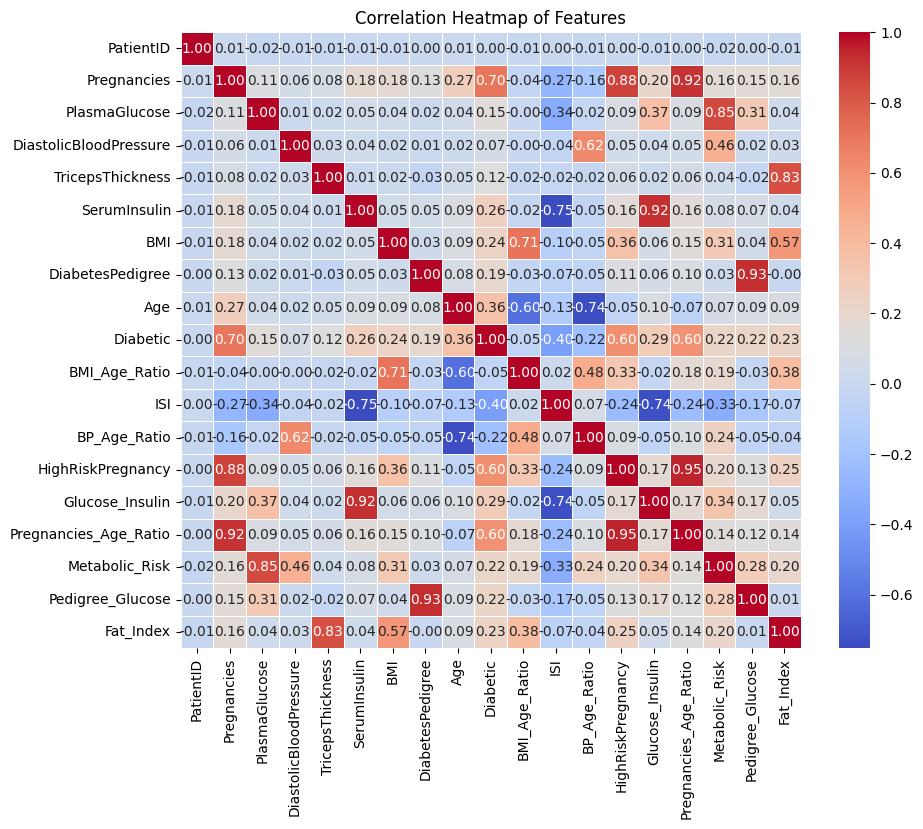

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


**Orginal data correlation matric**

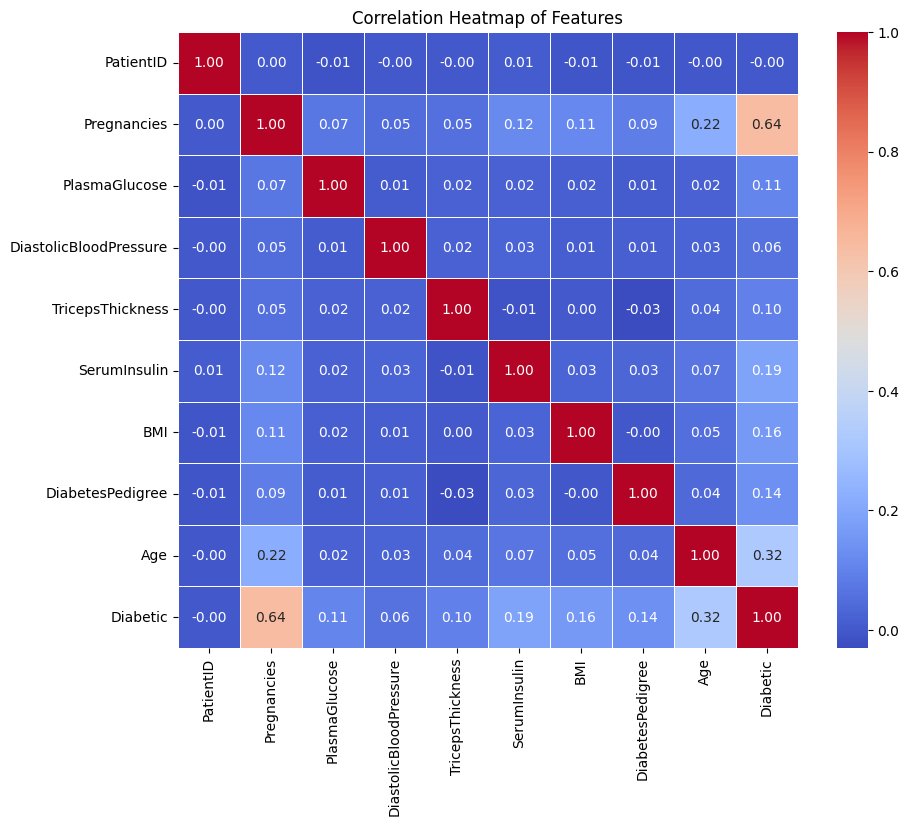

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


# **Random Forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
X = df.drop(columns=['Diabetic'])
y = df['Diabetic'] # target

# training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                   Feature  Importance
1              Pregnancies    0.185791
14   Pregnancies_Age_Ratio    0.130652
6                      BMI    0.126682
12       HighRiskPregnancy    0.109991
5             SerumInsulin    0.071284
8                      Age    0.048209
13         Glucose_Insulin    0.045788
9            BMI_Age_Ratio    0.040178
10                     ISI    0.037043
2            PlasmaGlucose    0.031669
4         TricepsThickness    0.030774
3   DiastolicBloodPressure    0.026233
11            BP_Age_Ratio    0.024817
17               Fat_Index    0.022118
15          Metabolic_Risk    0.020963
16        Pedigree_Glucose    0.018086
7         DiabetesPedigree    0.017059
0                PatientID    0.012662


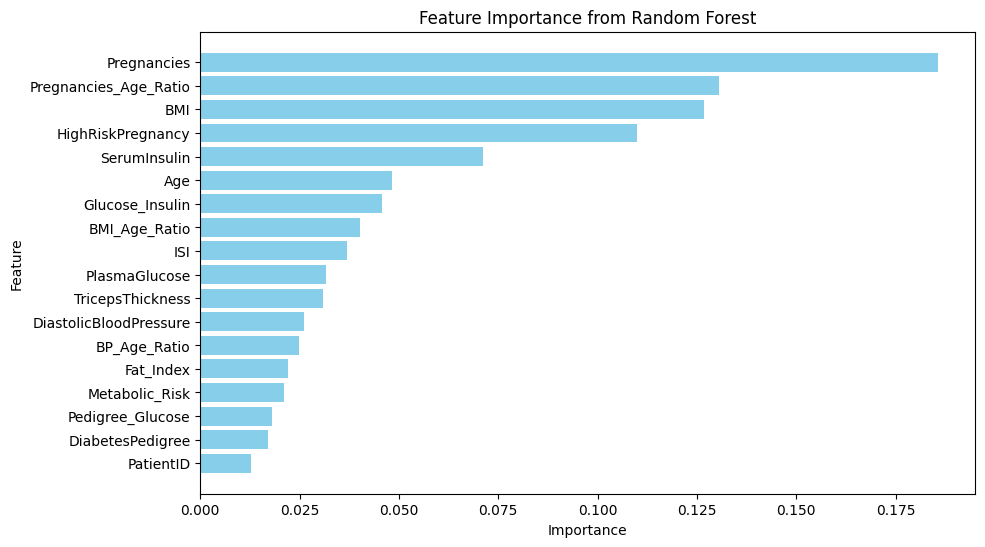

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

TARGET_COLUMN = 'Diabetic'

# Split features and target
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train_scaled, y_train)

# Feature importance
feature_importances = clf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Most important feature at the top
plt.show()


## **Model training**

**using k-fold cross validation**

**cross_val_score:** This function performs cross-validation by splitting the dataset into k folds. In this case, cv=10 specifies 10-fold cross-validation.

**scoring='accuracy':** This sets the metric used for evaluating the model's performance. You can change it to other metrics like precision, recall, or f1 if needed.

**cv_scores.mean():** This will give you the average accuracy across all folds.

**cv_scores.std():** This will provide the standard deviation of the accuracy across all folds, which gives an idea of how stable the model's performance is across different splits.

In [ ]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

features_to_keep = [
    'Pregnancies', 'Pregnancies_Age_Ratio', 'BMI', 'HighRiskPregnancy',
    'SerumInsulin', 'Age', 'BMI_Age_Ratio', 'Glucose_Insulin', 'ISI',
    'PlasmaGlucose', 'TricepsThickness', 'BP_Age_Ratio', 'Metabolic_Risk',
    'DiastolicBloodPressure', 'Fat_Index', 'Pedigree_Glucose', 'DiabetesPedigree'
]

X_train = X_train[features_to_keep]
X_test = X_test[features_to_keep]

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=False,
    random_state=42
)

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')

cv_results = pd.DataFrame(cv_scores, columns=['Fold Accuracy'])

mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

cv_results.loc['Mean Accuracy'] = mean_accuracy
cv_results.loc['Std Dev Accuracy'] = std_accuracy

print("\nCross-validation Results:")
print(cv_results)

rf_model.fit(X_train, y_train)

joblib.dump(rf_model, 'random_forest_model_tuned.joblib')
print("Model saved as 'random_forest_model_tuned.joblib'")

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)

print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Cross-validation Results:
                  Fold Accuracy
0                      0.951906
1                      0.950998
2                      0.960073
3                      0.941924
4                      0.950091
5                      0.946461
6                      0.955535
7                      0.943739
8                      0.948276
9                      0.949137
Mean Accuracy          0.949814
Std Dev Accuracy       0.005070
Model saved as 'random_forest_model_tuned.joblib'

Test Set Evaluation:
Accuracy: 0.9488

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1382
           1       0.95      0.94      0.95      1373

    accuracy                           0.95      2755
   macro avg       0.95      0.95      0.95      2755
weighted avg       0.95      0.95      0.95      2755



In [ ]:
y_pred = rf_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'\nTest Accuracy: {accuracy:.4f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9488

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1382
           1       0.95      0.94      0.95      1373

    accuracy                           0.95      2755
   macro avg       0.95      0.95      0.95      2755
weighted avg       0.95      0.95      0.95      2755


Confusion Matrix:
[[1317   65]
 [  76 1297]]


# **Random forest Validation**

Accuracy: 0.9504

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2055
           1       0.95      0.95      0.95      2078

    accuracy                           0.95      4133
   macro avg       0.95      0.95      0.95      4133
weighted avg       0.95      0.95      0.95      4133


Confusion Matrix:
[[1949  106]
 [  99 1979]]


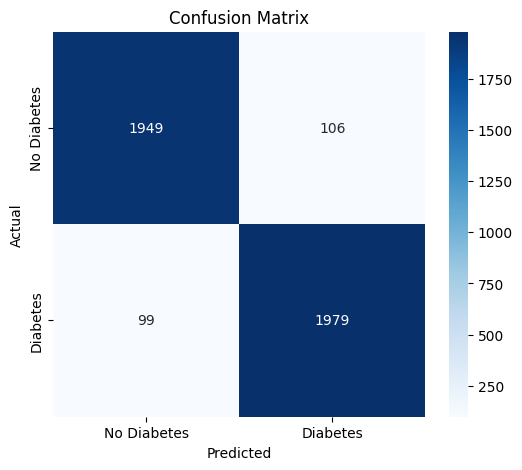

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print detailed classification report (precision, recall, F1-score, etc.)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Display confusion matrix
print('\nConfusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Optionally, plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Test on generated data**

**Overfitting:** The model shows perfect training accuracy (100%), but it doesn't perform equally well on the test set (92.37%). While the drop in accuracy from 100% to 92% isn't huge, it's an indication that the model might be overfitting to the training data. This is especially visible with the perfect recall and precision on the training set.

**Balanced Precision and Recall:** The model performs fairly well on both classes, with slightly higher recall for non-diabetic individuals (class 0). This means the model does a good job identifying most non-diabetic patients but misses some of the diabetic cases (lower recall for class 1).

**F1-Scores:** The F1-scores of 0.94 and 0.88 indicate that the model performs better for class 0, but overall, the performance is good for both classes. An F1-score closer to 1 for both classes would be ideal, but these results are acceptable.

In [ ]:
# Evaluate the model on the training set
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.9865
Test Accuracy: 0.9504

Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4832
           1       0.98      0.99      0.99      4809

    accuracy                           0.99      9641
   macro avg       0.99      0.99      0.99      9641
weighted avg       0.99      0.99      0.99      9641


Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2055
           1       0.95      0.95      0.95      2078

    accuracy                           0.95      4133
   macro avg       0.95      0.95      0.95      4133
weighted avg       0.95      0.95      0.95      4133



### **ROC Curve and AUC (Area Under the Curve)**

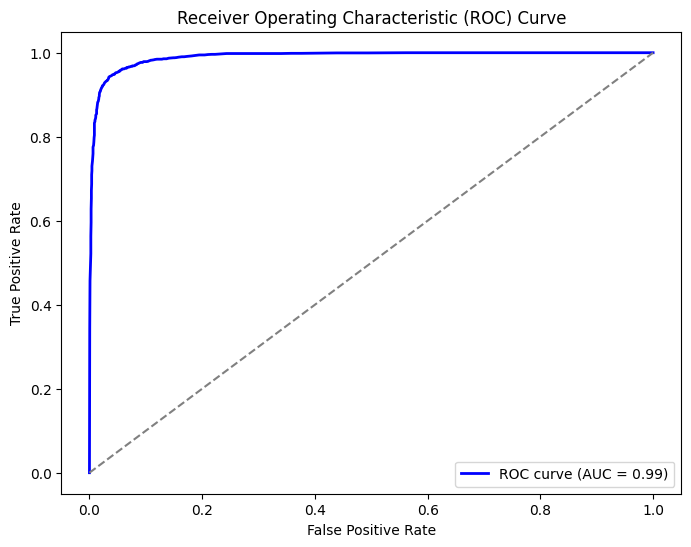

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


###  **Precision-Recall Curve**

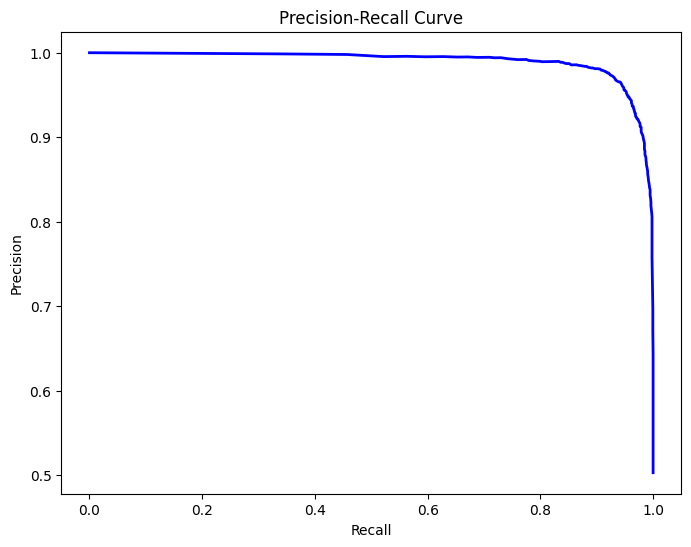

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
